In [1]:
import pandas as pd

ia_rep = pd.read_csv(
    filepath_or_buffer="../ln_shared_data/onestop/OneStop_v1_20250115/lacclab_processed/ia_Paragraph.csv",
    engine="pyarrow",
)

In [2]:
ia_rep_articles_subjs = ia_rep.query(
    "repeated_reading_trial == 1 and article_batch == 1 and question_preview == 0"
)[["participant_id", "article_id", "article_index"]].drop_duplicates()

In [3]:
ia_rep_articles_subjs


,participant_id,article_id,article_index
241555,l21_102,5,11
242095,l21_102,3,12
248506,l22_103,4,11
249112,l22_103,7,12
255634,l39_125,9,11
...,...,...,...
649286,l32_502,7,12
655807,l9_491,8,11
656431,l9_491,6,12
1549763,l28_495,7,11


In [4]:
import pandas as pd
import numpy as np

# Step 1: Create participants list from fold files
participants = []
for i in range(10):
    fold_participants = pd.read_csv(
        f"../data/folds_RereadStratified/subjects/fold_{i}.csv", header=None
    )
    participants_to_add = [
        x[0]
        for x in fold_participants.values
        if x[0] in ia_rep_articles_subjs["participant_id"].unique()
    ]

    # print: adding x participants for fold x
    print(f"Adding {len(participants_to_add)} participants for fold {i}")
    participants.extend(participants_to_add)

# Step 2: Define articles range
articles = list(range(1, 11))

# Step 3: Initialize result DataFrame
result = pd.DataFrame(0, index=articles, columns=participants)

# Debug: Check initial setup
print("Number of participants:", len(participants))
print("Number of articles:", len(articles))

# Step 4: Populate the result DataFrame
for _, row in ia_rep_articles_subjs.iterrows():
    participant = row["participant_id"]
    article = row["article_id"]
    article_index = row["article_index"]

    # Ensure participant and article exist in result DataFrame
    if article in result.index and participant in result.columns:
        if article_index == 11:
            result.loc[article, participant] = 1
        elif article_index == 12:
            result.loc[article, participant] = 2
    else:
        # Debug: Log missing participants or articles
        if participant not in result.columns:
            print(f"Participant {participant} not found in participants list.")
        if article not in result.index:
            print(f"Article {article} not found in articles range.")

# sort the columns of result by the order they appear in "participants"
result = result[participants]


# article_fold_indicator_mat = np.zeros((60, 10))
# for i in range(10):
#     article_fold_indicator_mat[6 * i : 6 * (i + 1), i] = 1

article_fold_indicator_mat = np.zeros((60, 10))
for i in range(10 - 1):
    article_fold_indicator_mat[54:60, i] = 1

vec = np.zeros(60)
vec[54:60] = 1

print(result.values.astype(bool).astype(int)[-2] @ vec)

Adding 6 participants for fold 0
Adding 6 participants for fold 1
Adding 6 participants for fold 2
Adding 6 participants for fold 3
Adding 6 participants for fold 4
Adding 6 participants for fold 5
Adding 6 participants for fold 6
Adding 6 participants for fold 7
Adding 6 participants for fold 8
Adding 6 participants for fold 9
Number of participants: 60
Number of articles: 10
1.0


In [5]:
shapes = {1: "$\u26ae$", 2: "$\u26af$"}  # type: ignore


In [6]:
shapes


{1: '$⚮$', 2: '$⚯$'}

In [7]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm


def char_in_font(Unicode_char, font):
    for cmap in font["cmap"].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "⚮"
font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])


/data/home/meiri.yoav/miniforge3/envs/decoding/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/data/home/meiri.yoav/miniforge3/envs/decoding/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/data/home/meiri.yoav/miniforge3/envs/decoding/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/data/home/meiri.yoav/miniforge3/envs/decoding/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf DejaVu Sans
/data/home/meiri.yoav/miniforge3/envs/lmrr/fonts/DejaVuSans.ttf DejaVu Sans
/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed.ttf DejaVu Sans
/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf DejaVu Sans
/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf DejaVu Sans
/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf DejaVu Sans
/

In [59]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

font_path = "/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf"
prop = mfm.FontProperties(
    fname=font_path,
    family="STIXGeneral",
    # mathtext.fontset
)

Bbox(x0=318.95523834228527, y0=-105.83333333333331, x1=1681.0447616577148, y1=-45.166666666666636)
2.0


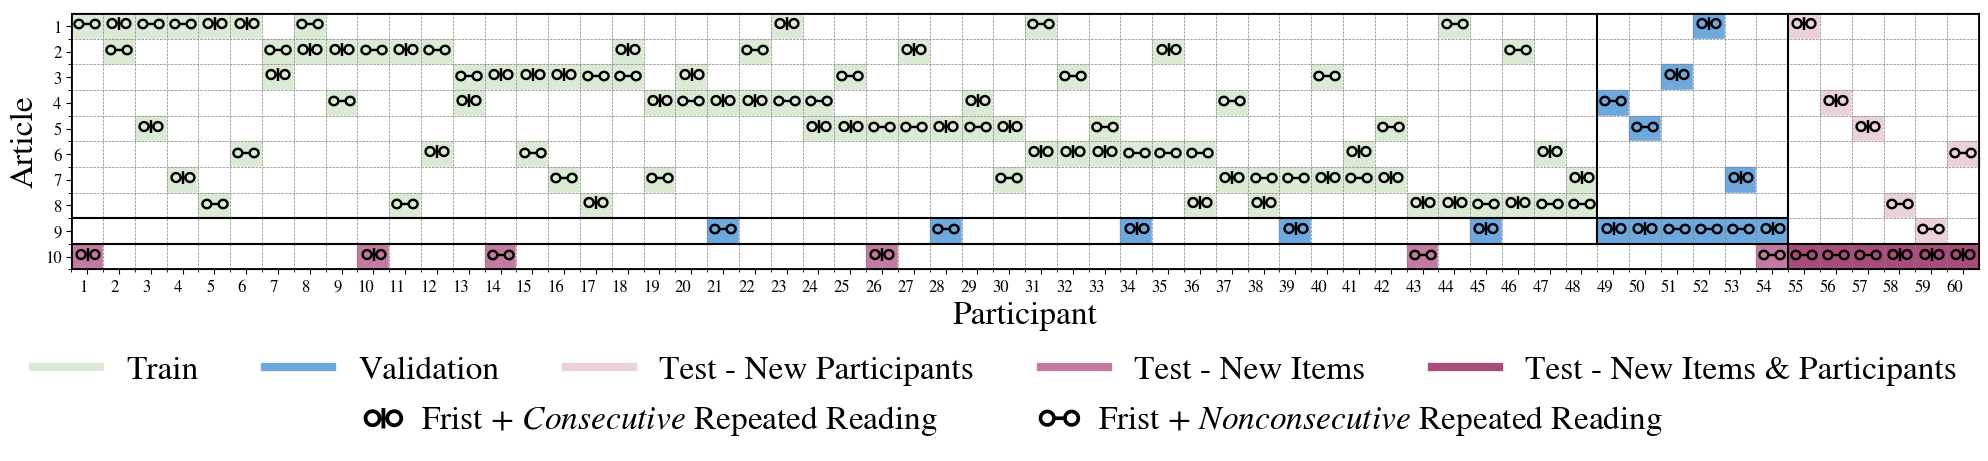

In [91]:
import matplotlib
from matplotlib.textpath import TextPath
import numpy as np

# import Affine2D

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

base_font_size = 24


# Define the colors for the regions
def get_cell_color(article, subject_idx, value):
    if value == 0:
        return "white"
    if article in range(1, 9):  # Articles 1-8
        if subject_idx in range(1, 49):  # Subjects 1-48
            return "#DAEAD4"
        elif subject_idx in range(48, 55):  # Subjects 48-54
            return "#6EA8DD"
        elif subject_idx in range(54, 61):  # Subjects 54-60
            return "#EAD1DC"
    elif article == 9:
        if subject_idx in range(1, 55):  # Subjects 1-54
            return "#6EA8DD"
        elif subject_idx in range(54, 61):  # Subjects 54-60
            return "#EAD1DC"
    elif article == 10:
        if subject_idx in range(1, 55):  # Subjects 1-54
            return "#C27BA0"
        elif subject_idx in range(54, 61):  # Subjects 54-60
            return "#A64D79"
    return "white"  # Default background color


# Adjusting the plot to include bold gridlines between rows and every 6 subjects

fig, ax = plt.subplots(figsize=(20, 3.5))
cmap = {0: "white", 1: "black", 2: "black"}
# shapes = {1: "$\u2039\u2039$", 2: "$\u2039\u2013\u2039$"}
# Plotting each cell with the specified background color and symbols
for i, article in enumerate(articles):
    for j, subject in enumerate(participants):
        value = result[result.columns[j]].iloc[i]
        # Determine the background color
        color = get_cell_color(i + 1, j + 1, value)
        ax.add_patch(plt.Rectangle((j, len(articles) - i - 1), 1, 1, color=color))
        # Optionally, you can add values or markers (like blue squares/red triangles) here if needed
        if value in [1, 2]:
            ax.text(
                j + 0.5,
                len(articles) - i - 0.5,
                "⚮" if value == 1 else "⚯",  # Use the desired Unicode character
                fontproperties=prop,
                fontsize=base_font_size,  # Adjust font size
                ha="center",  # Horizontal alignment
                va="center",  # Vertical alignment
            )
            # ax.scatter(
            #     ,
            #     ,
            #     color=cmap[value],
            #     marker=shapes[value],
            #     s=100 if value == 1 else 400,
            #     facecolors="none" if value == 1 else "black",
            #     # set fontsize to 20
            # )

# Formatting grid and axis
ax.set_xlim(0, len(participants))
ax.set_ylim(0, len(articles))
ax.set_xticks(np.arange(len(participants)) + 0.5, minor=False)
# set xlabel to be Participant ID
ax.set_xlabel("Participant", fontsize=base_font_size)
ax.set_xticklabels(
    list(range(1, len(participants) + 1)), ha="right", fontsize=base_font_size / 2
)  # Tilted 45 degrees
ax.set_yticks(np.arange(len(articles)) + 0.5, minor=False)
ax.set_yticklabels(articles[::-1], fontsize=base_font_size / 2)  # Reverse row order

# Add dashed gridlines between cells
ax.set_xticks(np.arange(len(participants)), minor=True)
ax.set_yticks(np.arange(len(articles)), minor=True)
# add ylabel to be "Article ID"
ax.set_ylabel("Article", fontsize=base_font_size)
ax.grid(which="minor", color="gray", linestyle="--", linewidth=0.5)

# # Adding bold gridlines for rows and every 6 subjects
# for i in range(10):  # Bold horizontal lines for rows
#     ax.axhline(i, color="black", linewidth=1.5)

ax.plot([0, 54], [2, 2], color="black", linewidth=1.5)
ax.plot([0, 60], [1, 1], color="black", linewidth=1.5)

# for i in range(1, len(participants) + 1, 6):  # Bold vertical lines every 6 subjects
#    ax.axvline(i, color="black", linewidth=1.5)

ax.plot([48, 48], [1, 10], color="black", linewidth=1.5)
ax.plot([54, 54], [0, 10], color="black", linewidth=1.5)

# Adding bold outer borders
ax.axhline(len(articles), color="black", linewidth=2)  # Top border
ax.axvline(len(participants), color="black", linewidth=2)  # Right border
ax.axhline(0, color="black", linewidth=2)  # Bottom border
ax.axvline(0, color="black", linewidth=2)  # Left border

# Add legend for the regions (colors)
color_legend_elements = [
    plt.Line2D([0], [0], color="#DAEAD4", lw=6, label="Train"),
    plt.Line2D([0], [0], color="#6EA8DD", lw=6, label="Validation"),
    plt.Line2D([0], [0], color="#EAD1DC", lw=6, label="Test - New Participants"),
    plt.Line2D([0], [0], color="#C27BA0", lw=6, label="Test - New Items"),
    plt.Line2D(
        [0], [0], color="#A64D79", lw=6, label="Test - New Items & Participants"
    ),
]

# Add the color legend at the bottom
fig.legend(
    handles=color_legend_elements,
    loc="lower center",
    fontsize=base_font_size,
    ncol=5,
    bbox_to_anchor=(0.5, -0.2),
    frameon=False,
)


# Create the TextPaths for the Unicode characters
unicode_char1 = "⚮"
unicode_char2 = "⚯"

# create textpaths for the unicode characters
text_path1 = TextPath((0, -25), unicode_char1, prop=prop, size=66)
text_path2 = TextPath((0, -25), unicode_char2, prop=prop, size=66)

legend_marker1 = plt.Line2D(
    [0],
    [0],
    lw=0,
    marker=text_path1,
    markersize=base_font_size * 2.5,
    markeredgecolor="black",
    markeredgewidth=0,
    markerfacecolor="black",
)
legend_marker2 = plt.Line2D(
    [0],
    [0],
    lw=0,
    marker=text_path2,
    markersize=base_font_size * 2.5,
    markeredgecolor="black",
    markeredgewidth=0,
    markerfacecolor="black",
)

# Add the legend with custom PathPatch elements
shape_leg = fig.legend(
    handles=[legend_marker1, legend_marker2],
    labels=[
        "Frist + $Consecutive$ Repeated Reading",
        "Frist + $Nonconsecutive$ Repeated Reading",
    ],
    loc="lower center",
    fontsize=base_font_size,
    ncol=2,
    bbox_to_anchor=(0.5, -0.35),
    frameon=False,
)


print(shape_leg.get_window_extent())
# get the xy of the handles and labels

print(shape_leg.columnspacing)


plt.tight_layout()
plt.show()


In [92]:
# save as svg
fig.savefig("figures/eval_reread_stratified.pdf", format="pdf", bbox_inches="tight")